In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib

In [10]:
train = pd.read_csv('C:\\Users\\CHAIT\\Downloads\\archive (5)\\Titanic-Dataset.csv')
test = pd.read_csv('C:\\Users\\CHAIT\\Downloads\\archive (5)\\Titanic-Dataset.csv')


train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# 1. Fill all missing values in the DataFrame with "Unknown"
df_filled = train.fillna("Unknown")
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])
train["Fare"] = train["Fare"].fillna(train["Fare"].median())


In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
train["Cabin"] = train["Cabin"].fillna("Unknown")
train["Cabin"] = train["Cabin"].str[0]

In [19]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U


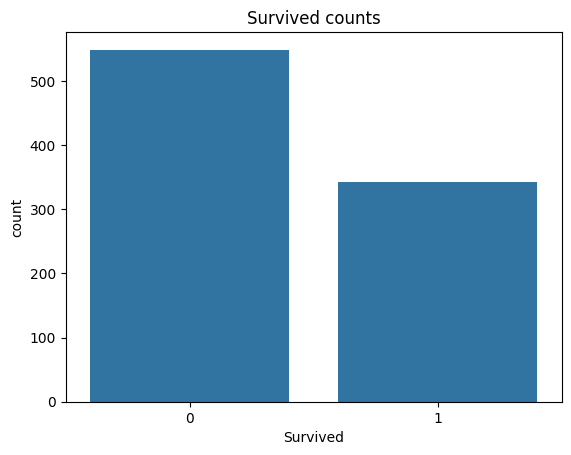

In [23]:
sns.countplot(x='Survived', data=train)
plt.title('Survived counts')
plt.show()

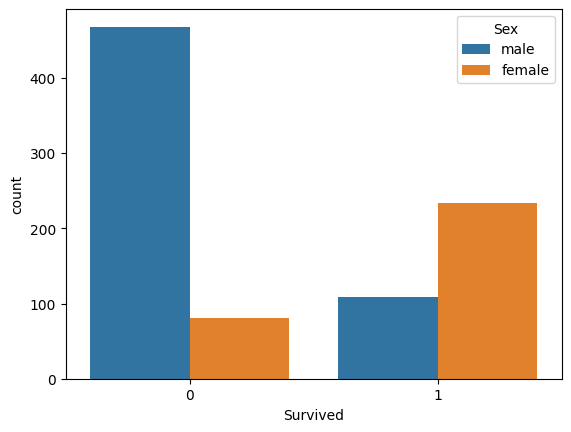

In [24]:
sns.countplot(x='Survived', hue='Sex', data=train)
plt.show()

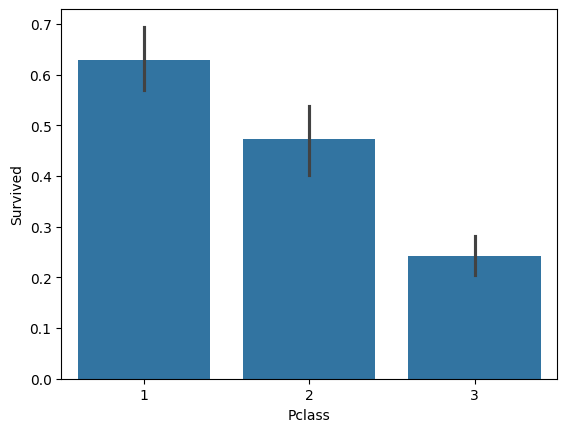

In [25]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

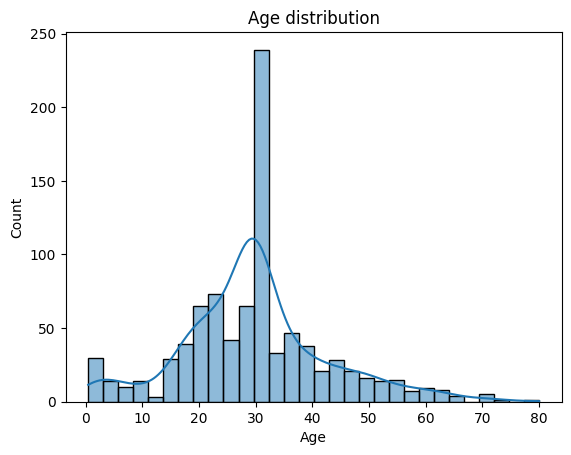

In [26]:
sns.histplot(train['Age'].dropna(), kde=True)
plt.title('Age distribution')
plt.show()

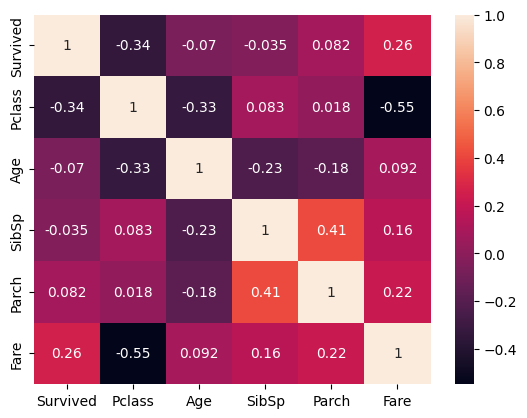

In [27]:
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.heatmap(train[num_cols].corr(), annot=True)
plt.show()

In [28]:
train_df = train.copy()
test_df = test.copy()
combine = pd.concat([train_df.drop('Survived', axis=1), test_df], sort=False)

In [31]:
combine['Title'] = combine['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
combine['Title'] = combine['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle','Ms'],'Miss')
combine['Title'] = combine['Title'].replace('Mme','Mrs')

In [33]:
combine['Embarked'] = combine['Embarked'].fillna(combine['Embarked'].mode()[0])

In [35]:
combine['Fare'] = combine.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [36]:
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [38]:
combine['Deck'] = combine['Cabin'].astype(str).str[0].replace('n', 'U')

In [39]:
age_map = combine.groupby('Title')['Age'].median()
combine['Age'] = combine.apply(lambda row: age_map[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [40]:
combine.drop(['Ticket','Cabin','Name'], axis=1, inplace=True)

In [41]:
categorical_cols = ['Sex','Embarked','Title','Deck','Pclass']
combine = pd.get_dummies(combine, columns=categorical_cols, drop_first=True)

In [42]:
X_train = combine.iloc[:len(train_df), :]
y_train = train_df['Survived']
X_test = combine.iloc[len(train_df):, :].reset_index(drop=True)

X_train.shape, X_test.shape

((891, 25), (891, 25))

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [44]:
numeric_features = ['Age','Fare','SibSp','Parch','FamilySize']
categorical_features = ['Sex','Embarked','Title','Deck','Pclass']

In [51]:
train['Title'] = (
    train['Name']
    .str.extract(r' ([A-Za-z]+)\.', expand=False)
    .replace(['Lady','Countess','Capt','Col','Don','Dr',
              'Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    .replace(['Mlle','Ms'], 'Miss')
    .replace('Mme', 'Mrs')
)


train['Deck'] = train['Cabin'].astype(str).str[0].replace('n', 'U')


target = 'Survived'
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck']

X = train[numeric_features + categorical_features]
y = train[target]


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.8324022346368715
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In [52]:
models = {
    'LogisticRegression': Pipeline([('preprocessor', preprocessor), ('clf', LogisticRegression(max_iter=1000))]),
    'RandomForest': Pipeline([('preprocessor', preprocessor), ('clf', RandomForestClassifier(n_estimators=100))])
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: mean acc = {scores.mean():.4f}, std = {scores.std():.4f}")

LogisticRegression: mean acc = 0.8301, std = 0.0186
RandomForest: mean acc = 0.8175, std = 0.0148


In [53]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 5, 10]
}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print('Best params:', grid.best_params_)
print('Best CV score:', grid.best_score_)

Best params: {'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best CV score: 0.8314192849404117


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



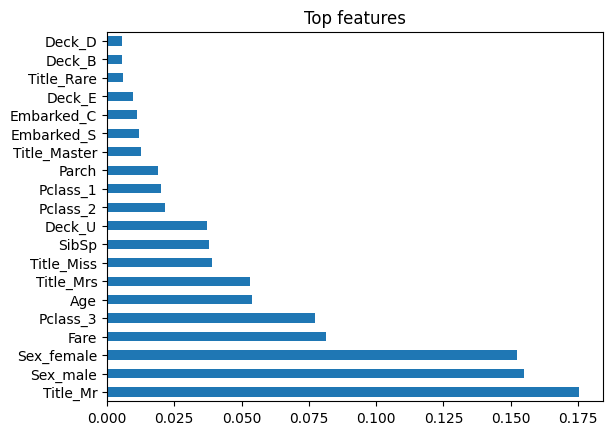

In [54]:
best_model = grid.best_estimator_

print(classification_report(y_val, best_model.predict(X_val)))

try:
    feature_names = numeric_features + list(best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
    importances = best_model.named_steps['classifier'].feature_importances_
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)
    fi.plot(kind='barh')
    plt.title('Top features')
    plt.show()
except Exception as e:
    print('Could not extract feature importances in this pipeline:', e)

In [61]:
def add_features(df):
    df = df.copy()
    df['Title'] = (
        df['Name']
        .str.extract(r' ([A-Za-z]+)\.', expand=False)
        .replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev',
                  'Sir','Jonkheer','Dona'], 'Rare')
        .replace(['Mlle','Ms'], 'Miss')
        .replace('Mme', 'Mrs')
    )
    df['Deck'] = df['Cabin'].astype(str).str[0].replace('n', 'U')
    return df

train = add_features(train)
test  = add_features(test)
features = numeric_features + categorical_features

X_train = train[features]
y_train = train['Survived']
X_test  = test[features]  
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": preds
})
submission.to_csv("submission.csv", index=False)



In [62]:
joblib.dump(best_model, 'titanic_best_model.joblib')

['titanic_best_model.joblib']

In [69]:
train[train["Survived"] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,C,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U,S,U,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U,C,U,Mrs


In [81]:
train[train["Survived"] == 1].count()

PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            342
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          342
Embarked       342
Deck           342
Title          342
dtype: int64

In [82]:
train[train["Survived"] == 0].count()

PassengerId    549
Survived       549
Pclass         549
Name           549
Sex            549
Age            549
SibSp          549
Parch          549
Ticket         549
Fare           549
Cabin          549
Embarked       549
Deck           549
Title          549
dtype: int64

In [76]:
train.groupby(['Sex', 'Pclass'])['Survived'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64

In [79]:
train.groupby(
    [pd.cut(train['Age'], [0,12,20,40,60,80]), 'Sex', 'Pclass'],
    observed=True
)['Survived'].count()

Age       Sex     Pclass
(0, 12]   female  1           1
                  2           8
                  3          23
          male    1           3
                  2           9
                  3          25
(12, 20]  female  1          13
                  2           8
                  3          24
          male    1           4
                  2          10
                  3          51
(20, 40]  female  1          54
                  2          47
                  3          88
          male    1          65
                  2          68
                  3         240
(40, 60]  female  1          24
                  2          13
                  3           8
          male    1          38
                  2          18
                  3          27
(60, 80]  female  1           2
                  3           1
          male    1          12
                  2           3
                  3           4
Name: Survived, dtype: int64

In [80]:
train[train["Survived"] == 0].groupby(
    [pd.cut(train["Age"], [0,12,20,40,60,80]), "Sex", "Pclass"],
    observed=False
)["Survived"].count()

Age       Sex     Pclass
(0, 12]   female  1           1
                  2           0
                  3          12
          male    1           0
                  2           0
                  3          16
(12, 20]  female  1           0
                  2           0
                  3          11
          male    1           3
                  2           9
                  3          45
(20, 40]  female  1           1
                  2           4
                  3          41
          male    1          38
                  2          63
                  3         210
(40, 60]  female  1           1
                  2           2
                  3           8
          male    1          25
                  2          17
                  3          25
(60, 80]  female  1           0
                  2           0
                  3           0
          male    1          11
                  2           2
                  3           4
Name: Survived,